Import all the required modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

In [2]:
plt.style.use('seaborn')

Using read_csv from pandas, read the dataset of confirmed cases and deaths.

In [3]:
df_conf=pd.read_csv("C:/Users/Administrator.DESKTOP-C9E863I/Desktop/Dataset/Confirmed.csv")
df_death=pd.read_csv("C:/Users/Administrator.DESKTOP-C9E863I/Desktop/Dataset/Deaths.csv")

In [4]:
print(df_conf.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20   ...     8/3/20  8/4/20  8/5/20  \
0        0        0        0        0   ...      36747   36782   36829   
1        0        0        0        0   ...       5620    5750    5889   
2        0        0        0        0   ...      31972   32504   33055   
3        0        0        0        0   ...        937     939     939   
4        0        0        0        0   ...       1280    1344    1395   

   8/6/20  8/7/20  8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  
0   36896   37015   37054   37054    37162    3

Convert dates into Integer

In [5]:
days=[]
for i in range(len(df_conf.iloc[:,4:].keys())):
    days+=[i]

Create an array of integer containing future dates.

In [6]:
future=[]
for i in range(len(df_conf.iloc[:,4:].keys())+21):
    future+=[i]

Compute the total confirmed cases and deaths on each day given in dataset.

In [7]:
conf=[]
death=[]

for i in df_conf.iloc[:,4:].keys():
    Conf=df_conf[i].sum()
    Death=df_death[i].sum()

    conf+=[Conf]
    death+=[Death]

In [8]:
future=np.array(future).reshape(-1,1)
days=np.array(days).reshape(-1,1)

death=np.array(death).reshape(-1,1)
conf=np.array(conf).reshape(-1,1)


Split the data of confirmed cases into training set and test set.

In [9]:
x_train,x_test,y_train,y_test=train_test_split(days,conf,test_size=0.15,random_state=3,shuffle=False)

In [10]:
p=PolynomialFeatures(degree=4)
x_train=p.fit_transform(x_train)
x_test=p.fit_transform(x_test)
future1=p.fit_transform(future)

In [11]:
lr_conf=LinearRegression(normalize=True)
lr_conf.fit(x_train, y_train)
pred=lr_conf.predict(x_test)
fut_pred=lr_conf.predict(future1)

In [12]:
print('Mean Absolute Error ->', metrics.mean_absolute_error(pred, y_test))

Mean Absolute Error -> 562862.1568981368


Compute the Integers back to dates

In [13]:
date="1/22/20"
future_date=[]
date_s=datetime.datetime.strptime(date,"%m/%d/%y")
for i in range(len(df_conf.iloc[:,4:].keys())+21):
    future_date+=[(date_s+datetime.timedelta(days=i)).strftime("%m/%d/%y")]

In [14]:
print(lr_conf.coef_)

[[ 0.00000000e+00 -3.83601587e+04  9.07940909e+02 -3.51212906e+00
   1.14388213e-02]]


Plot the graph to see the differnce between performance of your model and the given dataset.

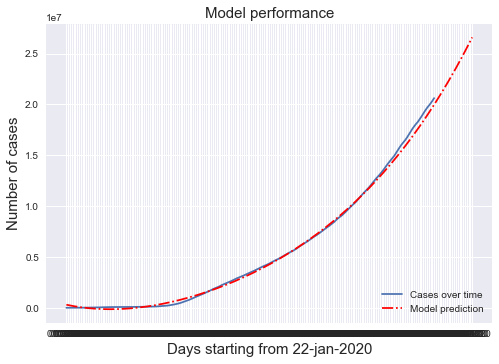

In [15]:
plt.figure()
plt.plot(days,conf)
plt.plot(future_date,fut_pred,linestyle="dashdot",color="red")
plt.title("Model performance",size=15)
plt.ylabel("Number of cases",size=15)
plt.xlabel("Days starting from 22-jan-2020",size=15)
plt.legend(["Cases over time","Model prediction"],loc="lower right")
plt.show()

In [16]:
fut_pred=fut_pred.ravel()

Print the future dates with total predicted cases till date.

In [17]:
print("Date","     Cases")
for x,y in zip(future_date[-21:],fut_pred[-21:]):
    print(x,y)

Date      Cases
08/13/20 20255468.384972565
08/14/20 20539133.40641168
08/15/20 20826063.011403605
08/16/20 21116292.543440823
08/17/20 21409857.620547514
08/18/20 21706794.135279596
08/19/20 22007138.254724666
08/20/20 22310926.42050206
08/21/20 22618195.3487628
08/22/20 22928982.03018966
08/23/20 23243323.729997084
08/24/20 23561257.987931248
08/25/20 23882822.61827004
08/26/20 24208055.709823046
08/27/20 24536995.625931602
08/28/20 24869681.00446871
08/29/20 25206150.757839113
08/30/20 25546444.072979257
08/31/20 25890600.411357284
09/01/20 26238659.508973084
09/02/20 26590661.376358233


Now lets predict the deaths in future due to covid-19.
Split the death dataset into training and test data.

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(days,death,test_size=0.15,random_state=42,shuffle=False)

In [19]:
p1=PolynomialFeatures(degree=2)
X_train=p1.fit_transform(X_train)
X_test=p1.fit_transform(X_test)
future2=p1.fit_transform(future)

In [20]:
lr_death=LinearRegression(normalize=True)
lr_death.fit(X_train,Y_train)
pred_death=lr_death.predict(X_test)
fut_death=lr_death.predict(future2)

In [21]:
print('Mean Absolute Error ->', metrics.mean_absolute_error(pred_death, Y_test))

Mean Absolute Error -> 73441.47325570366


Plot the graph to see the performance of your model.

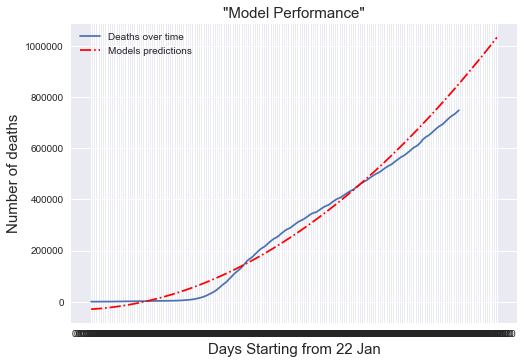

In [22]:
plt.figure()
plt.plot(days,death)
plt.plot(future_date,fut_death,linestyle="dashdot",color="red")
plt.title('"Model Performance"',size=15)
plt.xlabel('Days Starting from 22 Jan',size=15)
plt.ylabel('Number of deaths',size=15)
plt.legend(['Deaths over time','Models predictions'])
plt.show()

In [23]:
fut_death=fut_death.ravel()

Print future dates with total predicted deaths till date.

In [24]:
print("Date","     Deaths")
for x,y in zip(future_date[-21:],fut_death[-21:]):
    print(x,y)

Date      Deaths
08/13/20 860893.9476852318
08/14/20 869207.4027701515
08/15/20 877559.3805850573
08/16/20 885949.8811299496
08/17/20 894378.9044048279
08/18/20 902846.4504096924
08/19/20 911352.5191445433
08/20/20 919897.1106093803
08/21/20 928480.2248042034
08/22/20 937101.8617290129
08/23/20 945762.0213838086
08/24/20 954460.7037685903
08/25/20 963197.9088833586
08/26/20 971973.6367281128
08/27/20 980787.8873028533
08/28/20 989640.6606075801
08/29/20 998531.956642293
08/30/20 1007461.7754069922
08/31/20 1016430.1169016777
09/01/20 1025436.9811263493
09/02/20 1034482.368081007
